In [221]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas.util.testing as tm
import warnings
warnings.filterwarnings('ignore')

In [222]:
 PR = pd.read_csv('train.csv',encoding='utf-8')# For uploading  the Dataset
PR.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [223]:
PR.rename(columns={'Is_Response':'label','Description':'message'},inplace=True)#Change the name for convientent 

In [224]:
PR.head()

,User_ID,message,Browser_Used,Device_Used,label
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [225]:
print ('Shape = >',PR.shape)#Check the shape 

Shape = > (38932, 5)


In [226]:
print ('happy and not happy  counts','\n',PR.label.value_counts())#Count that How Many Happy and Not Happy

happy and not happy  counts 
 happy        26521
not happy    12411
Name: label, dtype: int64


In [227]:
print ('Negitive ratio = ', round(len(PR[PR['label']=='not happy']) / len(PR.label),2)*100,'%')#Calculate the Ratio For NotHappy 
print ('Positive ratio  = ', round(len(PR[PR['label']=='happy']) / len(PR.label),2)*100,'%')#Calculate the Ratio For Happy

Negitive ratio =  32.0 %
Positive ratio  =  68.0 %


In [228]:
PR['length'] = PR.message.str.len()#ADD the Length Coulmn for Messsage Length
PR.head(2)

,User_ID,message,Browser_Used,Device_Used,label,length
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,248
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,1077


In [229]:
from unicodedata import normalize#Remobve the Accent For the Meassage

remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

PR['message'] = PR['message'].apply(remove_accent)

In [230]:
PR['message'] = PR['message'].str.lower()#Convert itno the Lower case

In [231]:
PR['message'] = PR['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',#Remove the Punctution 
                                 'emailaddress')


PR['message'] = PR['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

PR['message'] = PR['message'].str.replace(r'£|\$', 'dollers')
    

PR['message'] = PR['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    

PR['message'] = PR['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [232]:
PR['message'] = PR['message'].str.replace(r'[^\w\d\s]', ' ')

PR['message'] = PR['message'].str.replace(r'\s+', ' ')

PR['message'] = PR['message'].str.replace(r'^\s+|\s+?$', '')

In [233]:
PR.head()

,User_ID,message,Browser_Used,Device_Used,label,length
0,id10326,the room was kind of clean but had a very stro...,Edge,Mobile,not happy,248
1,id10327,i stayed at the crown plaza april april the st...,Internet Explorer,Mobile,not happy,1077
2,id10328,i booked this hotel through hotwire at the low...,Mozilla,Tablet,not happy,1327
3,id10329,stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,502
4,id10330,my girlfriends and i stayed here to celebrate ...,Edge,Tablet,not happy,1613


In [234]:
PR.shape

(38932, 6)

In [235]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [236]:
import string
import nltk
from nltk.corpus import  stopwords
#Remove the Stopwords
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure',''])

PR['message'] = PR['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [237]:
processed= PR["message"].iloc[0:38932]
print(processed)

0        room kind clean strong smell dogs generally av...
1        stayed crown plaza april april staff friendly ...
2        booked hotel hotwire lowest price could find g...
3        stayed husband sons way alaska cruise loved ho...
4        girlfriends stayed celebrate th birthdays plan...
                               ...                        
38927    arrived late night walked check area completel...
38928    positive impression location public parking op...
38929    traveling friends shopping show location great...
38930    experience ok paid extra view pool got view pa...
38931    westin wonderfully restored grande dame hotel ...
Name: message, Length: 38932, dtype: object


In [238]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('wordnet')
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [239]:
Lemmatizer=nltk.stem.WordNetLemmatizer()#Lemmatize the message to form the words to its root form 
for i in range(len(processed)):
  words=nltk.word_tokenize(processed[i])
  words=[Lemmatizer.lemmatize(w) for w in words]
  processed[i]=" ".join( words)


In [240]:
print(processed)
PR['clean_length'] = PR.message.str.len()#After pre-processing add one more column of clea_text 
PR.head()

0        room kind clean strong smell dog generally ave...
1        stayed crown plaza april april staff friendly ...
2        booked hotel hotwire lowest price could find g...
3        stayed husband son way alaska cruise loved hot...
4        girlfriend stayed celebrate th birthday planne...
                               ...                        
38927    arrived late night walked check area completel...
38928    positive impression location public parking op...
38929    traveling friend shopping show location great ...
38930    experience ok paid extra view pool got view pa...
38931    westin wonderfully restored grande dame hotel ...
Name: message, Length: 38932, dtype: object


,User_ID,message,Browser_Used,Device_Used,label,length,clean_length
0,id10326,room kind clean strong smell dog generally ave...,Edge,Mobile,not happy,248,139
1,id10327,stayed crown plaza april april staff friendly ...,Internet Explorer,Mobile,not happy,1077,636
2,id10328,booked hotel hotwire lowest price could find g...,Mozilla,Tablet,not happy,1327,777
3,id10329,stayed husband son way alaska cruise loved hot...,InternetExplorer,Desktop,happy,502,327
4,id10330,girlfriend stayed celebrate th birthday planne...,Edge,Tablet,not happy,1613,958


In [241]:
print ('Origian Length', PR.length.sum())#Sum of the length of message before preprocessing 
print ('Clean Length', PR.clean_length.sum())#Sum of the length of message after preprocessing 

Origian Length 33725876
Clean Length 20244930


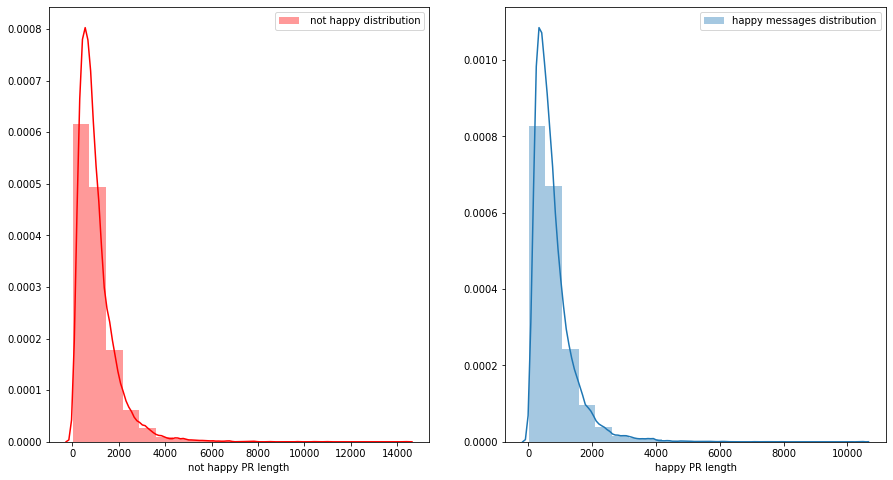

In [242]:
f,ax = plt.subplots(1,2,figsize = (15,8))#Length Comparisen

sns.distplot(PR[PR['label']=='not happy']['length'],bins=20,ax=ax[0],label=' not happy distribution',color='r')

ax[0].set_xlabel('not happy PR length')
ax[0].legend()

sns.distplot(PR[PR['label']=='happy']['length'],bins=20,ax=ax[1],label='happy messages distribution')
ax[1].set_xlabel('happy PR length')
ax[1].legend()

plt.show()

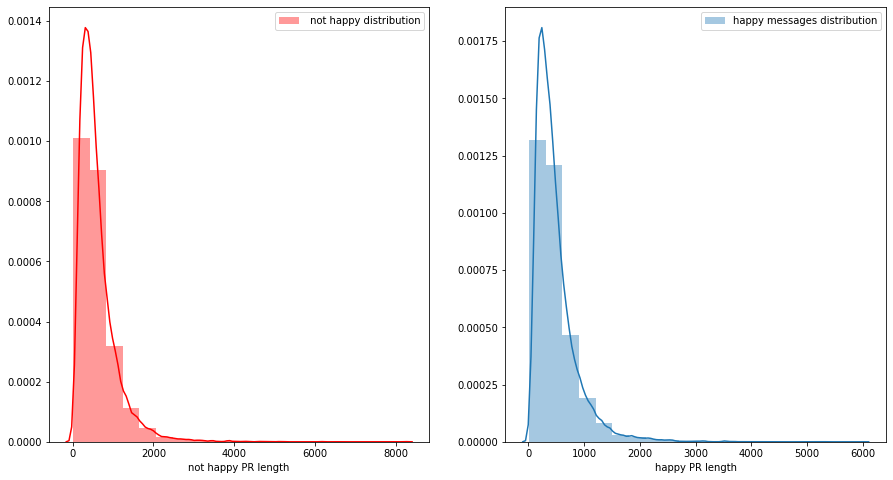

In [243]:
#Comparisen after preprocessing of clean_text
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(PR[PR['label']=='not happy']['clean_length'],bins=20,ax=ax[0],label=' not happy distribution',color='r')

ax[0].set_xlabel('not happy PR length')
ax[0].legend()

sns.distplot(PR[PR['label']=='happy']['clean_length'],bins=20,ax=ax[1],label='happy messages distribution')
ax[1].set_xlabel('happy PR length')
ax[1].legend()

plt.show()

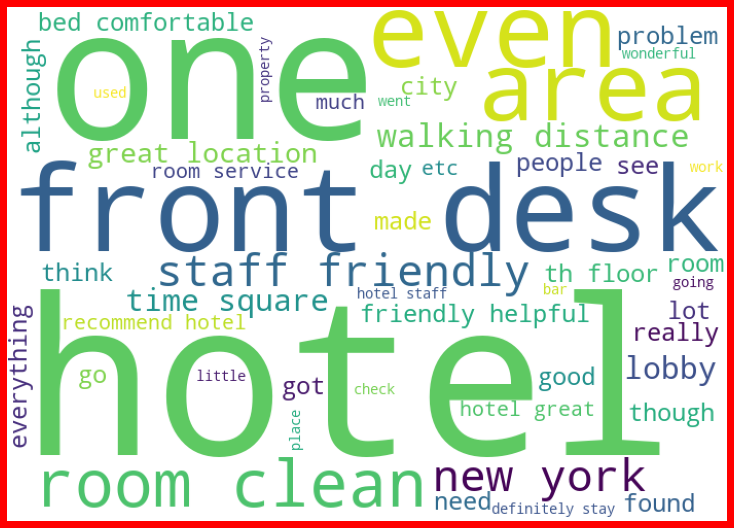

In [244]:
 #Wordcloud for happy message 
from wordcloud import WordCloud

spams = PR['message'][PR['label']=='happy']

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

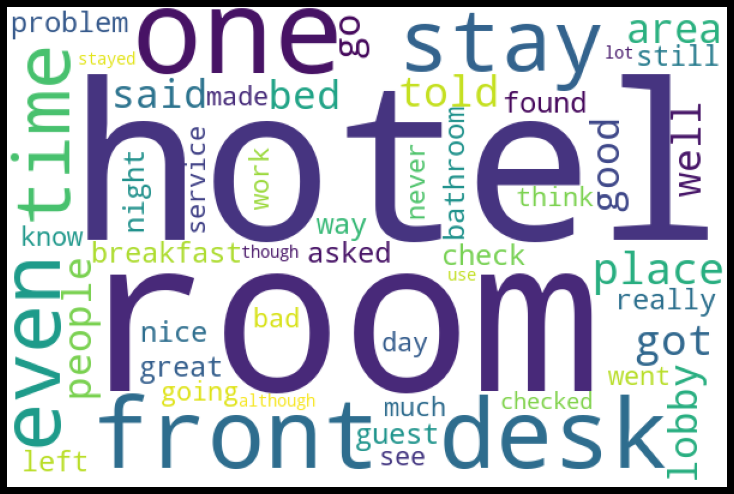

In [245]:
#wordcloud for nothappy
hams = PR['message'][PR['label']=='not happy']
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [246]:
from sklearn import preprocessing #label encoding for convert string value to int 
lb=preprocessing.LabelEncoder()

In [247]:
PR['Browser_Used']=lb.fit_transform(PR['Browser_Used'])
PR['Browser_Used'].unique()
PR['Device_Used']=lb.fit_transform(PR['Device_Used'])
PR['Device_Used'].unique()
PR['label']=lb.fit_transform(PR['label'])
PR['label'].unique()

array([1, 0])

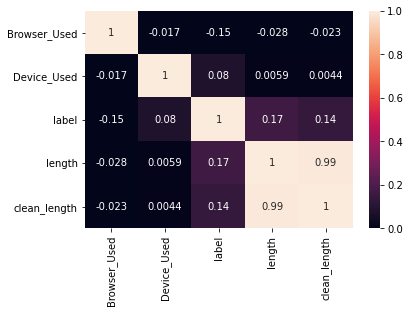

In [248]:
sns.heatmap(PR.corr(),vmax = 1, vmin = 0,annot = True)#Determine the Correlation between labels
plt.show()

In [249]:
from sklearn.feature_extraction.text import TfidfVectorizer #tfidf vectorizer to assign a vectorize value 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#ngram_range=(1,2)
tf_vec = TfidfVectorizer(ngram_range=(1,2))

naive = MultinomialNB()

PR['message'] = tf_vec.fit_transform(PR['message'])

x=PR[['message','Browser_Used','Device_Used']].copy()
X = features
y = PR['label']

In [250]:
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)

naive.fit(X_train,Y_train)

y_pred= naive.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.8107469433884722


In [251]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [252]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      6637
           1       0.96      0.42      0.59      3096

    accuracy                           0.81      9733
   macro avg       0.87      0.71      0.73      9733
weighted avg       0.84      0.81      0.79      9733



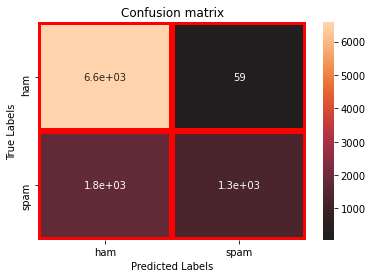

In [253]:
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham','spam'])
plt.show()

In [254]:
conf_mat

array([[6578,   59],
       [1783, 1313]])

In [255]:
from sklearn.model_selection import cross_val_score#cross validation 
from sklearn.model_selection import cross_val_predict

In [256]:
score=cross_val_score(naive,X,y,cv=5,scoring='f1_macro')
print('score of mean \n',score.mean())
print('score of standard devition \n',score.std())
y_pred=cross_val_predict(naive,X,y,cv=5)
print('prediction \n',y_pred)


score of mean 
 0.7366644596938234
score of standard devition 
 0.006037472875196045
prediction 
 [0 0 0 ... 1 1 0]


In [257]:
from sklearn.metrics import roc_curve #rocauc curve for determine the result
from sklearn.metrics import roc_auc_score

In [258]:
y_pred_probe=naive.predict_proba(x_test)[:,0]

In [259]:
y_pred_probe

array([0.91349208, 0.97582102, 0.98634614, ..., 0.98665314, 0.58966644,
       0.85564412])

In [260]:
tpr,fpr,thersholds=roc_curve(y_test,y_pred_probe)

In [261]:
tpr#True Positive Rate

array([0.00000000e+00, 1.50670484e-04, 3.34488474e-02, ...,
       9.99849330e-01, 1.00000000e+00, 1.00000000e+00])

In [262]:
fpr#False Positive Rate

array([0.        , 0.        , 0.        , ..., 0.95994832, 0.95994832,
       1.        ])

In [263]:
thersholds

array([1.99829899, 0.99829899, 0.9921507 , ..., 0.08787863, 0.08728203,
       0.00295796])

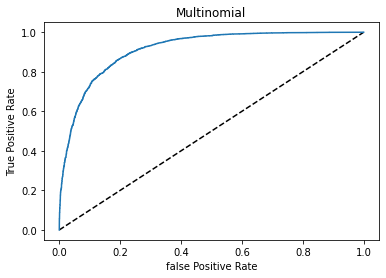

In [264]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Multinomial')
plt.xlabel('false Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multinomial')
plt.show()

In [265]:
from sklearn.linear_model import LogisticRegression#One more model used to predict the result 
lg=LogisticRegression()


In [266]:
lg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [267]:
pred=lg.predict(x_test)
print(pred)

[0 0 0 ... 0 0 1]


In [268]:
print('accuracy score',accuracy_score(pred,y_test))#accuracy score of result

accuracy score 0.8850303092571663


In [269]:
print('confusion_matrix',confusion_matrix(y_test,pred))

confusion_matrix [[6257  380]
 [ 739 2357]]


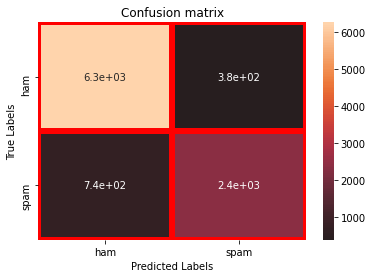

In [270]:
conf_mat = confusion_matrix(y_test,pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham','spam'])
plt.show()

In [271]:
score=cross_val_score(lg,X,y,cv=5,scoring='f1_macro')#Calculate the Cross validation 
print('score of mean \n',score.mean())
print('score of standard devition \n',score.std())
y_pred=cross_val_predict(naive,X,y,cv=5)
print('prediction \n',y_pred)


score of mean 
 0.8622606650433651
score of standard devition 
 0.0035881721483372285
prediction 
 [0 0 0 ... 1 1 0]


In [272]:
y_pred_probe=lg.predict_proba(x_test)[:,0]

In [273]:
y_pred_probe

array([0.77937678, 0.93581818, 0.97478895, ..., 0.99535237, 0.60384263,
       0.09549005])

In [274]:
tpr,fpr,thersholds=roc_curve(y_test,y_pred_probe)

In [275]:
tpr

array([0.00000000e+00, 1.50670484e-04, 5.90628296e-02, ...,
       9.99849330e-01, 1.00000000e+00, 1.00000000e+00])

In [276]:
fpr

array([0.       , 0.       , 0.       , ..., 0.9001938, 0.9001938,
       1.       ])

In [277]:
thersholds

array([1.99980337e+00, 9.99803372e-01, 9.92798822e-01, ...,
       3.79170462e-02, 3.78986296e-02, 8.37276407e-04])

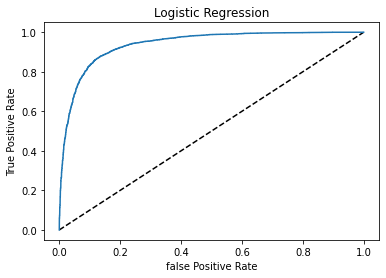

In [278]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression ')
plt.xlabel('false Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.show()

In [279]:
from sklearn.ensemble import RandomForestClassifier#Used One more model to 

In [280]:
classifer2=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifer2.fit(X_train,Y_train)
y_pred2=classifer2.predict(x_test)


In [281]:
print('accuracy score',accuracy_score(y_pred2,y_test))

accuracy score 0.7961574026507757


In [282]:
print('confusion_matrix',confusion_matrix(y_test,y_pred2))

confusion_matrix [[6373  264]
 [1720 1376]]


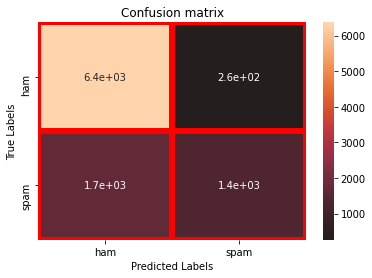

In [283]:
conf_mat = confusion_matrix(y_test,y_pred2)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham','spam'])
plt.show()

In [284]:
score=cross_val_score(classifer2,X,y,cv=5,scoring='f1_macro')
print('score of mean \n',score.mean())
print('score of standard devition \n',score.std())
y_pred=cross_val_predict(naive,X,y,cv=5)
print('prediction \n',y_pred)


score of mean 
 0.7246916486394455
score of standard devition 
 0.005276531732460116
prediction 
 [0 0 0 ... 1 1 0]


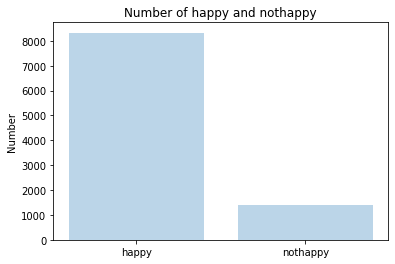

In [285]:
total_nothappy=0
total_happy=0
for i in range(len(y_pred2)):
  if (y_pred[i]==1):
    total_nothappy+=1
  else:
    total_happy+=1
obj=['happy','nothappy']
y_pos=np.arange(len(obj))
plt.bar(y_pos,[total_happy,total_nothappy],alpha=0.3)
plt.xticks(y_pos,obj)
plt.ylabel('Number')
plt.title('Number of happy and nothappy')
plt.show()